In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np


In [2]:
#bola= pd.read_csv('/mnt/storage/JIRA/last600days.csv',low_memory=False) #read the  datafile
#df= pd.read_csv('/mnt/storage/JIRA/XVIEWER.csv',low_memory=False) #read the  datafile

#df = pd.read_csv('/mnt/storage/JIRA/AURORA_first_part.csv',low_memory=False)
aurora1 = pd.read_csv('/mnt/storage/JIRA/AURORA_recent_1.csv',low_memory=False)
aurora2 = pd.read_csv('/mnt/storage/JIRA/AURORA_recent_2.csv',low_memory=False)
aurora3 = pd.read_csv('/mnt/storage/JIRA/AURORA_recent_3.csv',low_memory=False)

flow1 = pd.read_csv('/mnt/storage/JIRA/DEC_18/FLOW_0_1000.csv',low_memory=False)
flow2 = pd.read_csv('/mnt/storage/JIRA/DEC_18/FLOW_1000_2000.csv',low_memory=False)
flow3 = pd.read_csv('/mnt/storage/JIRA/DEC_18/FLOW_2000_3000.csv',low_memory=False)
flow4 = pd.read_csv('/mnt/storage/JIRA/DEC_18/FLOW_3000_4000.csv',low_memory=False)
flow5 = pd.read_csv('/mnt/storage/JIRA/DEC_18/FLOW_4000_5000.csv',low_memory=False)
flow6 = pd.read_csv('/mnt/storage/JIRA/DEC_18/FLOW_5000_6000.csv',low_memory=False)
#df5 = pd.read_csv('/mnt/storage/JIRA/AURORA_recent_5.csv',low_memory=False)
#df6 = pd.read_csv('/mnt/storage/JIRA/AURORA_seventh_part.csv',low_memory=False)

aurora_datasets = [aurora1,aurora2,aurora3]
flow_datasets = [flow1,flow2,flow3,flow4,flow5,flow6]
aurora_original = pd.concat(aurora_datasets,ignore_index=True)
flow_original = pd.concat(flow_datasets,ignore_index=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [3]:
import collections
import statistics
import datetime

In [4]:
def select_issues_of_severity(data_frame, severity_list, negation = False):
    indexes = [negation != (x in severity_list) for x in data_frame['Priority']]
    return data_frame[indexes]

def select_issues_by_type(data_frame, type_list, negation = False):
    indexes = [negation != (x in type_list) for x in data_frame['Issue Type']]
    return data_frame[indexes]

def select_issues_by_status(data_frame, status_list, negation = False):
    indexes = [negation != (x in status_list) for x in data_frame['Status']]
    return data_frame[indexes]

def select_issues_by_date(data_frame,column_name,min_d, max_d):
    indexes = [ pd.to_datetime(min_d) <= x < pd.to_datetime(max_d) for x in data_frame[column_name]]
    return data_frame[indexes]    


def check_if_other_finish_name(var):   
    return var.isin([ 'Done','Resolvido'])

def today_datetime():
    return pd.Timestamp.today()

def issue_is_finished(row):
    res = row['Resolved']
    if False == pd.isnull(res):
        return True
    else:
        stat = row['Status']
        if stat in ['Done', 'Resolvido']:
            return True
        else:
            return False
        
def issue_finish_date(row):
    res = row['Resolved']
    if False == pd.isnull(res):
        return res
    else:
        stat = row['Status']
        if stat in['Done', 'Resolvido']:
            return row['Updated']
        else:
            return today_datetime()
        
def select_resolved(data_frame):
    index = (pd.isnull(data_frame['Resolved'])== False)|(check_if_other_finish_name(data_frame['Status']) )
    return data_frame[index]

def select_unresolved(data_frame):
    index = (pd.isnull(data_frame['Resolved'])== False)|(check_if_other_finish_name(data_frame['Status']) )    
    return data_frame[~index]


def days_from_creation_to_closure(row):
    resolution_time = issue_finish_date(row)
    fromdate = row['Created']
    todate = resolution_time
    daygenerator = (fromdate + datetime.timedelta(x + 1) for x in range((todate - fromdate).days))
    return sum(1 for day in daygenerator if day.weekday() <5)        
    
    
def select_issues_unresolved(data_f, negation = False):
    return data_f[ negation != pd.isnull(data_f['Resolved']) ]

In [ ]:
#START DATA CLEANUP

In [5]:
aurora= aurora_original
i0 = aurora[aurora['Issue key'] == 'AURORA-5419'].index
i1 = aurora[aurora['Issue key'] == 'AURORA-5087'].index
i2 = aurora[aurora['Issue key'] == 'AURORA-5226'].index
i3 = aurora[aurora['Issue key'] == 'AURORA-5275'].index
i4 = aurora[aurora['Issue key'] == 'AURORA-5101'].index
aurora = aurora.drop(i0);
aurora = aurora.drop(i1);
aurora = aurora.drop(i2);
aurora = aurora.drop(i3);
aurora = aurora.drop(i4)

In [6]:
attachment_list = ['Attachment.' + str(x) for x in range(1,37)]
comment_list = ['Comment.'+ str(x) for x in range (1,110)]
watchers_list = ['Watchers.'+str(x) for x in range (1,15)]
log_work_list = ['Log Work.'+ str(x) for x in range (1,2400)]
try:
    aurora = aurora.drop(['Affects Version/s', 'Affects Version/s.1','Affects Version/s.2', 'Affects Version/s.3'], axis=1)    
except ValueError:
    print("Likely misssing column in Data frame")
try:
    aurora = aurora.drop(attachment_list, axis=1)
except ValueError:
    print("Likely misssing column in Data frame")
try:
    aurora = aurora.drop(comment_list,axis=1)
except ValueError:
    print("Likely misssing column in Data frame")
try:
    aurora = aurora.drop(watchers_list, axis=1)
except ValueError:
    print("Likely misssing column in Data frame")

In [6]:
flow = flow_original

In [7]:
#lets convert the Created and resolved columns to proper datetimes
#aurora['Created'] = pd.to_datetime(aurora['Created'])
#aurora['Resolved'] = pd.to_datetime(aurora['Resolved'])
#aurora['Updated'] = pd.to_datetime(aurora['Updated'])
flow['Created'] = pd.to_datetime(flow['Created'])
flow['Resolved'] = pd.to_datetime(flow['Resolved'])
flow['Updated'] = pd.to_datetime(flow['Updated'])

In [ ]:
#END OF DATA CLEANUP

In [8]:
def times_registered_in_hours(data_frame):
    return data_frame['Time Spent']/3600

def select_issue_by_name(data_frame, issue_name):
    return data_frame[data_frame['Issue key'] == issue_name].iloc[0]

def components_list(data_frame):
    components = ['Component/s.' + str(x) for x in range(1,6)]
    components.append('Component/s')     
    return data_frame[components]

def contains_one_of_component_list(data_frame, component_name_list):
    df_by_comp = components_list(data_frame)
    truth_table = df_by_comp.isin(component_name_list)
    components = ['Component/s.' + str(x) for x in range(1,6)]
    start = 'Component/s'
    combiner = truth_table[start]
    for c in components:
        combiner = combiner | truth_table[c]
    return data_frame[combiner]

def contains_none_of_component_list(data_frame, component_name_list):
    df_by_comp = components_list(data_frame)
    truth_table = df_by_comp.isin(component_name_list)
    components = ['Component/s.' + str(x) for x in range(1,6)]
    start = 'Component/s'
    combiner = truth_table[start]
    for c in components:
        combiner = combiner | truth_table[c]
    return data_frame[np.logical_not(combiner)]
    

In [9]:
def issues_created_in_time_frame(data, period_s, period_e):
    proc_s = pd.to_datetime(period_s)
    proc_e = pd.to_datetime(period_e)
    index_creation = [ (proc_e > x > proc_s) for x in data['Created']]
    return data[index_creation]

def issues_unresolved_in_time_frame(data,period_s, period_e):
    proc_s = pd.to_datetime(period_s)
    proc_e = pd.to_datetime(period_e)
    issues_created_before_b = issues_created_in_time_frame(data,proc_s,proc_e)
    index_on_created = [(issue_finish_date(x[1]) > proc_e) for x in issues_created_before_b.iterrows()]
    return issues_created_before_b[index_on_created]

In [10]:
def accumulation_of_time_to_resolved(data_frame, column_name, list_of_possibilities):
    t = histogram_of_occurrences_by_days_to_resolved(data_frame, column_name, list_of_possibilities)
    res=[]
    for key, value in t.items():
        res.append(key*value)
    return res

def histogram_issues_unresolved_by_month(data_frame,start_date, months):
    hist = {}
    proc_s = pd.to_datetime(start_date)
    start_of_month = proc_s.replace(day=1)
    range_dates = pd.date_range(start_of_month, periods=months, freq='1M')
    for i in range(0,len(range_dates)-1):
        sl = issues_unresolved_in_time_frame(data_frame,range_dates[i],range_dates[i+1])
        co = len(sl)
        hist[str(range_dates[i+1])[0:7]]=co
    return hist

def histogram_issues_unresolved_by_week(data_frame, start_date, weeks):
    hist = {}
    proc_s = pd.to_datetime(start_date)
    start_of_month = proc_s.replace(day=1)
    range_dates = pd.date_range(start_of_month, periods=months, freq='1W')
    for i in range(0,len(range_dates)-1):
        sl = issues_unresolved_in_time_frame(data_frame,range_dates[i],range_dates[i+1])
        co = len(sl)
        hist[str(range_dates[i+1])[0:7]]=co
    return hist

def histogram_creations_by_month(data_frame,column_name,list_of_possibilities):
    hist = { }
    indexes   = [(x in list_of_possibilities) for x in data_frame[column_name]]
    issues    = data_frame[indexes]
    for index, row  in issues.iterrows():
        creation = row['Created']                
        key = str(creation.year) +"-"+ str(creation.month)
        if key in hist:
            hist[key] += 1
        else:
            hist[key] = 1
    return  hist

def histogram_days_to_resolved_by_month_of_creation(data_frame, column_name, list_of_possibilities):
    hist ={}
    indexes   = [(x in list_of_possibilities) for x in data_frame[column_name]]
    issues    = data_frame[indexes]
    for index, row  in issues.iterrows():
        creation = row['Created']        
        t = max(1,days_from_creation_to_closure(row))
        key = str(creation.year) +"-"+ str(creation.month)
        if key in hist:
            hist[key] += t
        else:
            hist[key] = t
    return  hist

def order_histogram(hist):
    od = collections.OrderedDict(sorted(hist.items()))
    return od

def histogram_of_occurrences_by_days_to_resolved(data_frame, column_name, list_of_possibilities):
    hist ={}
    indexes   = [(x in list_of_possibilities) for x in data_frame[column_name]]
    issues    = data_frame[indexes]
    for index, row  in issues.iterrows():
        creation = row['Created']        
        t = days_from_creation_to_closure(row)
        key = int(max(1,t))
        if key in hist:
            hist[key] += 1
        else:
            hist[key] = 1
    return hist

def derivatives_of_histogram_values(histogram):    
    prev = next(iter(histogram))
    prev_value = histogram[prev]
    hist={}
    for key, value in histogram.items():
        hist[key] = value - prev_value
        prev_value = value
    return hist

In [11]:
flow['Issue Type'].unique()

array(['Bug Externo', 'Improvement', 'Bug Interno', 'Task',
       'Requisição - Dúvida', 'New Feature', 'Epic', 'Support',
       'Auxílio outras áreas', 'Bug Funcional', 'Bug task',
       'Task Técnica', 'Problem', 'Oportunidade de Melhoria',
       'Technical task', 'Análise', 'Build', 'Story', 'Requisição',
       'Incidente', 'Development task', 'Melhoria', 'Integração',
       'Treinamento', 'Adequação', 'Manutenção', 'Incidente/Problema',
       'Inconsistência de Documentação', 'Tarefa', 'Access', 'Sugestão',
       'Conhecimento', 'Documentation task', 'TestCase', 'Processo'],
      dtype=object)

In [12]:
#arya_bugs = contains_one_of_component_list(select_issues_by_type(aurora,['Bug','Bug Interno', 'Bug Externo']),['Arya'])
#all_arya = contains_one_of_component_list(aurora,['Arya'])
#not_arya = contains_none_of_component_list(aurora,['Arya','Trebuchet','DicomWebServices'])

#aurora_bugs = select_issues_by_type(aurora,['Bug','Bug Interno','Bug Externo'])
flow_bugs   = select_issues_by_type(flow,['Bug','Bug Interno','Bug Externo','Bug Task'])

In [17]:
#aurora_restrict_date = select_issues_by_date(aurora_bugs,'Created','1-Dec-2017','1-Jul-2018')
flow_old_issues = select_issues_by_date(flow_bugs,'Created','1-Dec-2013','1-Jun-2018')
flow_recent_issues = select_issues_by_date(flow_bugs,'Created','2-Jun-2018','31-Dec-2018')
#aurora_unresolved = histogram_issues_unresolved_by_month(aurora_restrict_date,'1-Dec-2017',4*12)
histogram_flow_old_unresolved   = histogram_issues_unresolved_by_month(flow_old_issues,'25-Dec-2018',4*12)
histogram_flow_recent_unresolved = histogram_issues_unresolved_by_month(flow_old_issues,'25-Dec-2018',4*12)



In [ ]:
from scipy.stats.stats import pearsonr  

def display_histogram(datasets):
    x_axis= sorted(set(flow_unresolved.keys()).union(set(aurora_unresolved.keys())))
    y0 = [None] * len(x_axis)
    y1 = [None] * len(x_axis)
    count=0
    for x in x_axis:
        if x in flow_unresolved :
            y0[count]  = flow_unresolved[x]
        if x in aurora_unresolved:
            y1[count] = aurora_unresolved[x]
        count+=1 
    max_v = max(0.1,max(max(y0,y1)))  
    ny0 = [x/max_v for x in y0]
    ny1 = [x/max_v for x in y1]
    print(pearsonr(ny0,ny1))
    figure(num=None, figsize=(10,10), dpi = 100, facecolor='w', edgecolor='k')
    figure(figsize=(50,12))
    plt.plot(range(len(x_axis)), y0, label='flow')
    plt.plot(range(len(x_axis)), y1, label='aurora')
    plt.legend(loc='upper left')
    plt.xticks(range(len(x_axis)), x_axis)
    plt.show()

(0.9397048968608216, 1.3462086784631486e-22)


<Figure size 1000x1000 with 0 Axes>

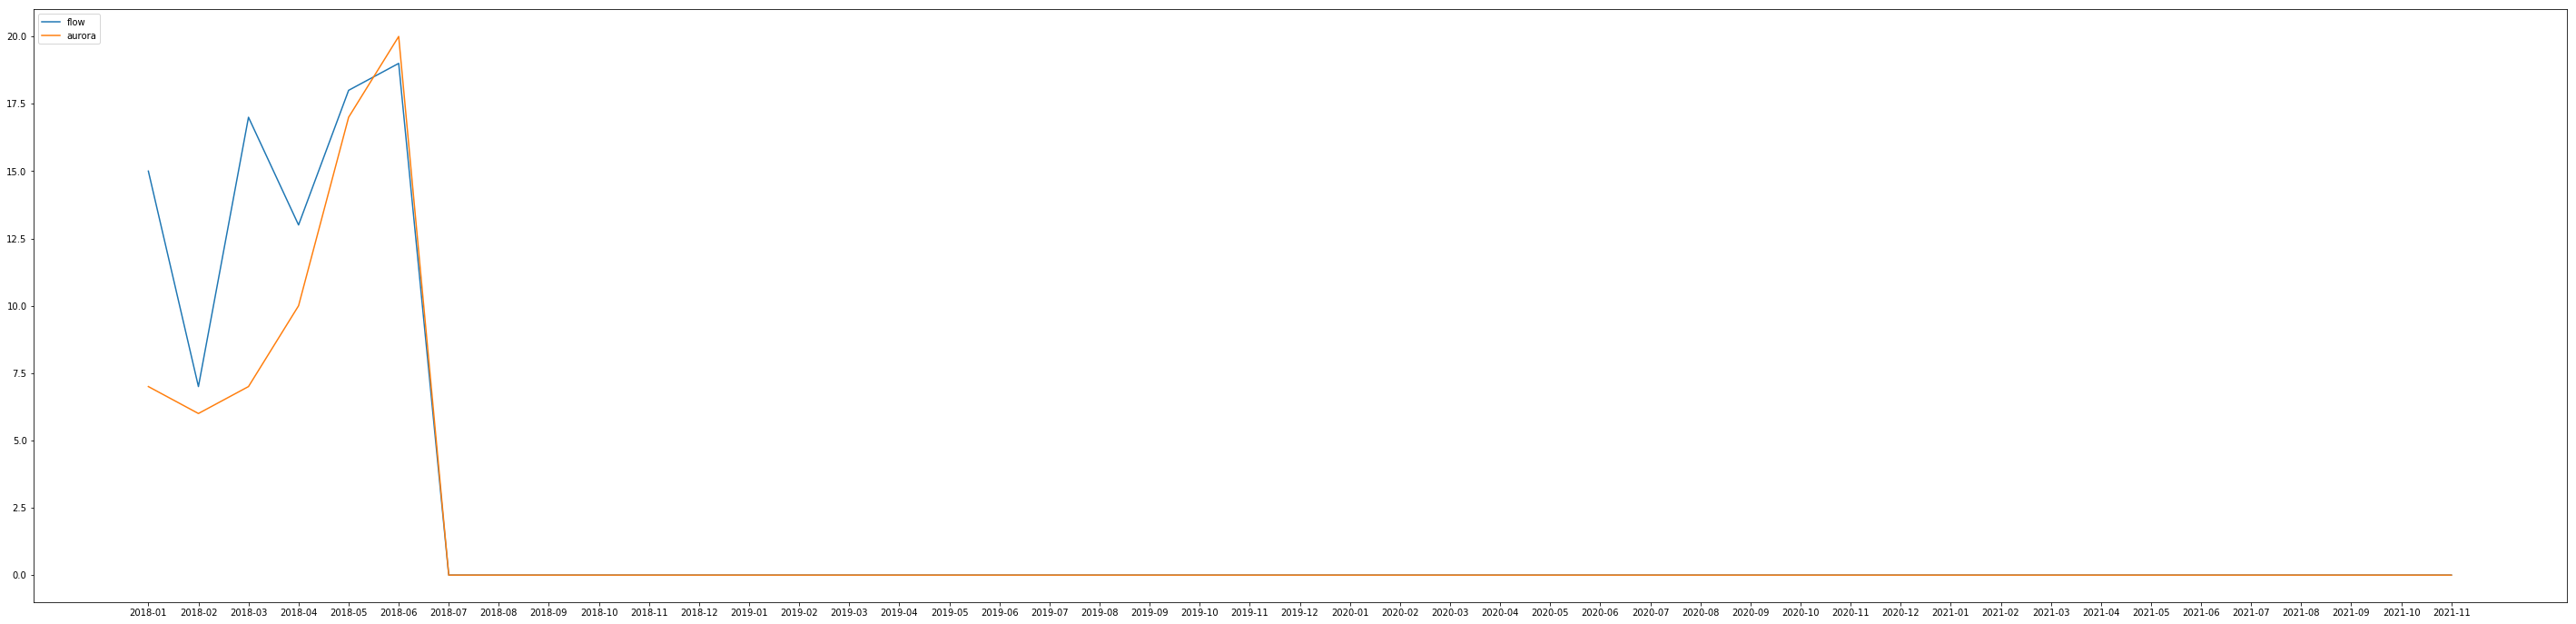

In [99]:

    
    
x_axis= sorted(set(flow_unresolved.keys()).union(set(aurora_unresolved.keys())))
y0 = [None] * len(x_axis)
y1 = [None] * len(x_axis)
count=0
for x in x_axis:
    if x in flow_unresolved :
        y0[count]  = flow_unresolved[x]
    if x in aurora_unresolved:
        y1[count] = aurora_unresolved[x]
    count+=1 
max_v = max(0.1,max(max(y0,y1)))  
ny0 = [x/max_v for x in y0]
ny1 = [x/max_v for x in y1]
print(pearsonr(ny0,ny1))
figure(num=None, figsize=(10,10), dpi = 100, facecolor='w', edgecolor='k')
figure(figsize=(50,12))
plt.plot(range(len(x_axis)), y0, label='flow')
plt.plot(range(len(x_axis)), y1, label='aurora')
plt.legend(loc='upper left')
plt.xticks(range(len(x_axis)), x_axis)
plt.show()

In [85]:


other = order_histogram(histogram_of_occurrences_by_days_to_resolved(not_arya,'Issue Type',['Bug','Bug Interno', 'Bug Externo']))
flowother = order_histogram(histogram_of_occurrences_by_days_to_resolved(flow,'Issue Type',['Bug','Bug Interno','Bug Externo', 'Bug Task']))

In [16]:
def print_histogram_from_ordered_set(od):
    figure(num=None, figsize=(10,10), dpi = 100, facecolor='w', edgecolor='k')
    figure(figsize=(50,12))
    plt.bar(range(len(od)), list(od.values()), align='center')
    plt.xticks(range(len(od)), list(od.keys()))
    plt.show()

<Figure size 1000x1000 with 0 Axes>

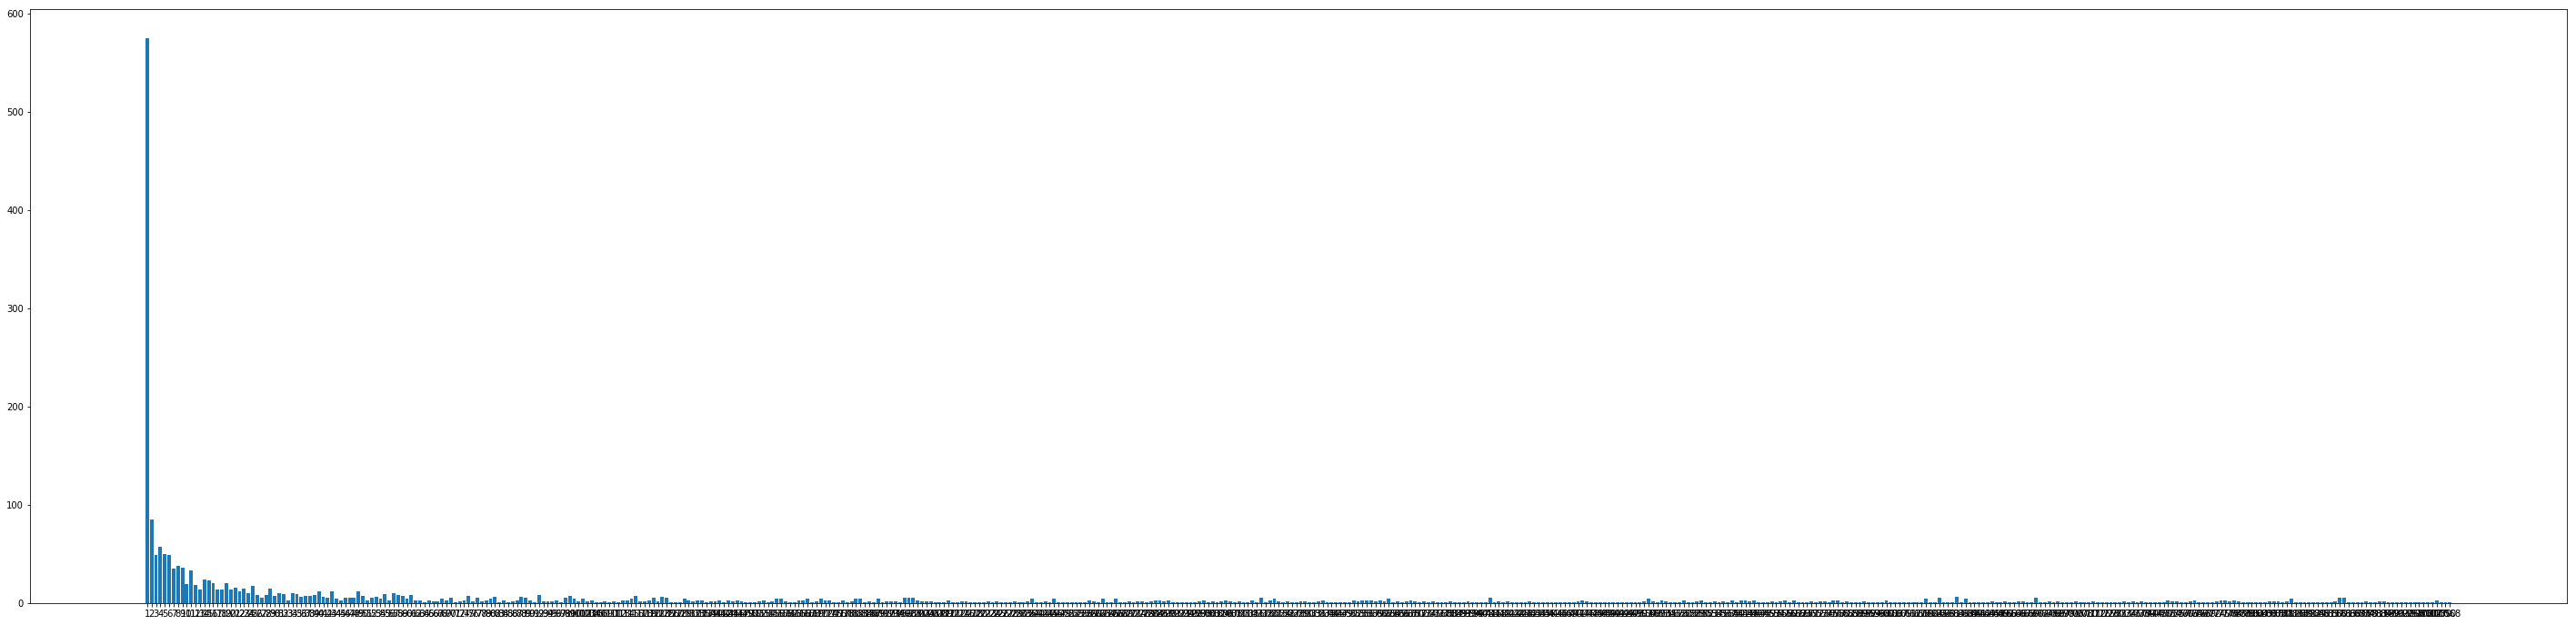

In [18]:
print_histogram_from_ordered_set(order_histogram(flowother))


<Figure size 1000x1000 with 0 Axes>

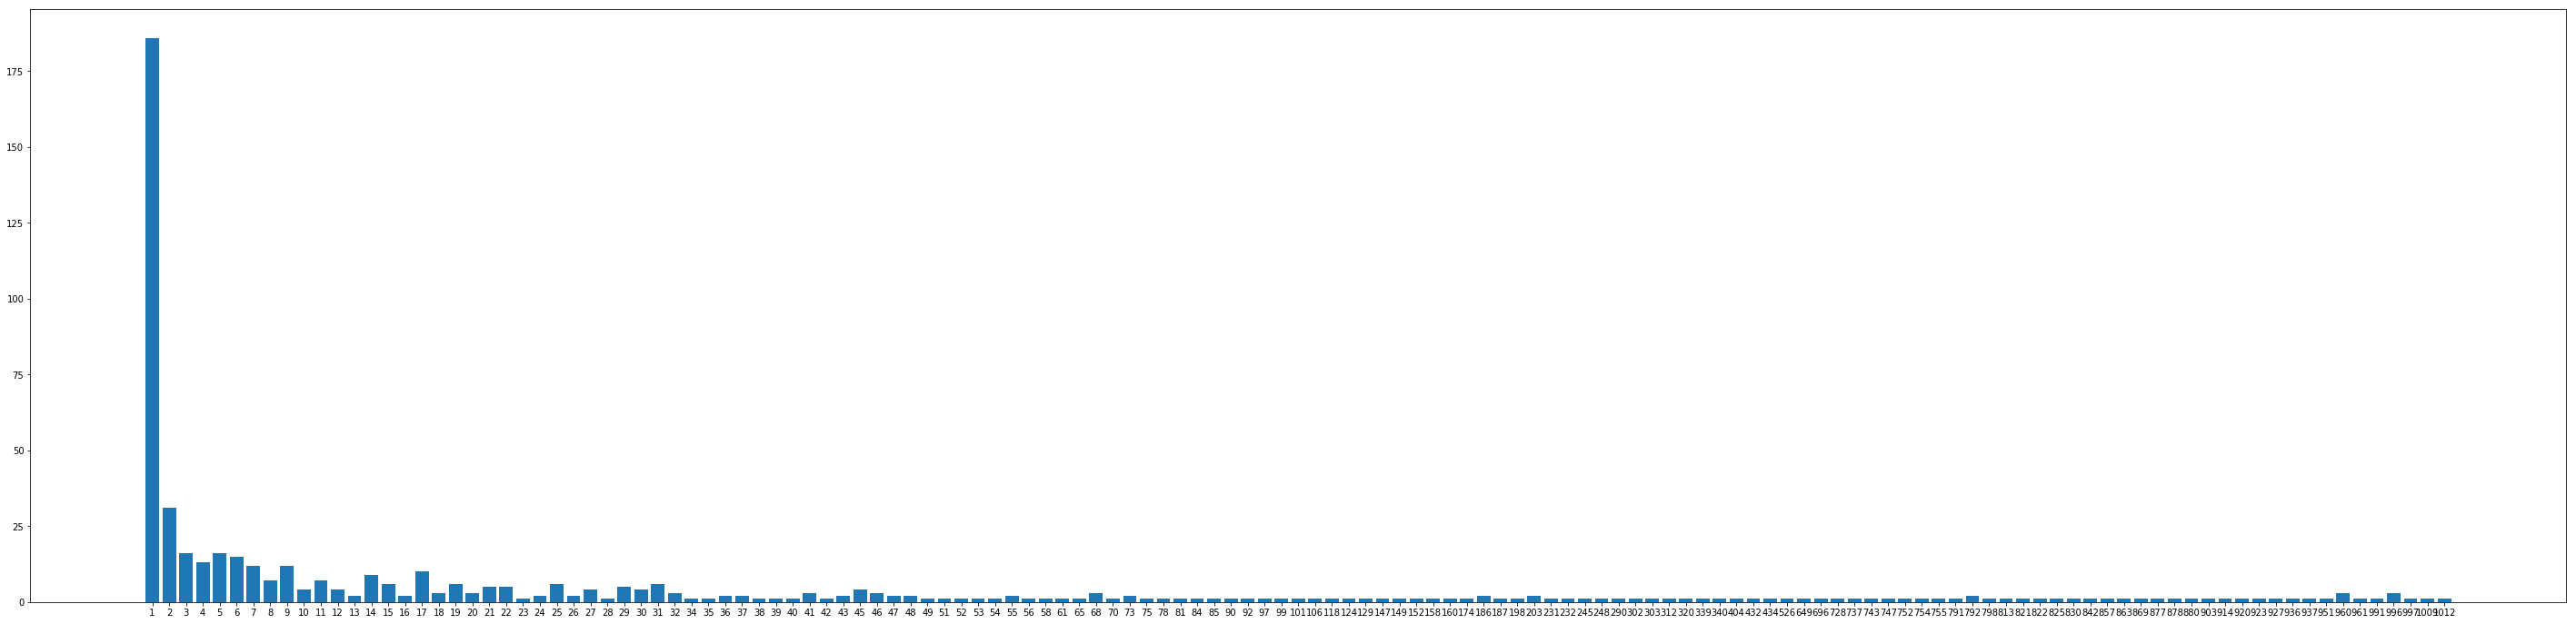

In [303]:
print_histogram_from_ordered_set(order_histogram(other))

(0.476549071483638, 0.0007084759242301723)


<Figure size 1000x1000 with 0 Axes>

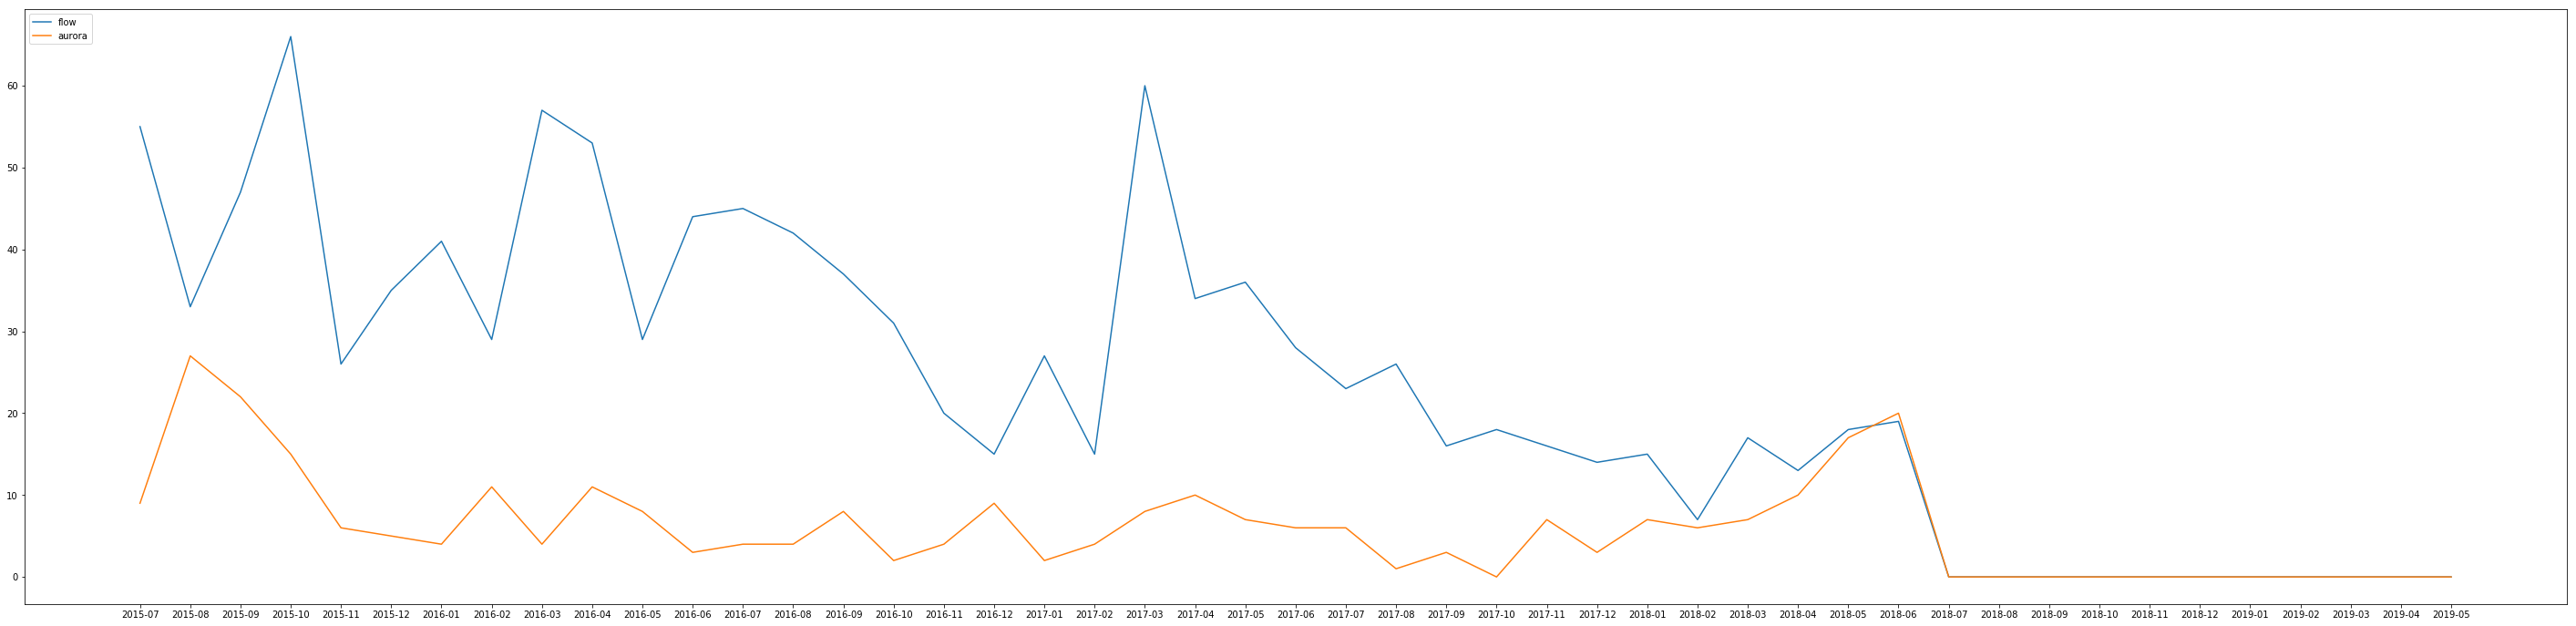

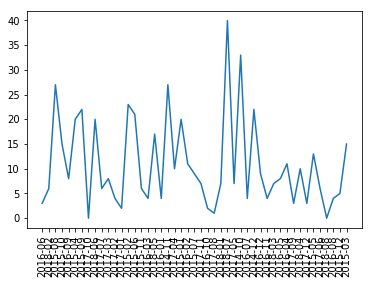

In [41]:


plt.plot(aurora_unresolved.keys(),aurora_unresolved.values())
#plt.plot(flow_unresolved.values())
#plt.xlabel(flow_unresolved.keys())
plt.xticks(rotation=90)
plt.show()

In [313]:
def average_occurrences_by_days_to_resolved(data, col,list_acc):
    hist = histogram_of_occurrences_by_days_to_resolved(data,col,list_acc)
    acc=0
    counter=0
    for index , value in hist.items():
        acc += index* value
        counter+=index
    return acc/float(counter)

In [315]:
average_occurrences_by_days_to_resolved(arya_bugs,'Issue Type',['Bug','Bug Interno', 'Bug Externo'])

1.1924342105263157

In [171]:
def average_histogram_on_non_zero_bins(histogram):
    soma = sum(histogram.values())
    tmp = [1 if x > 0 else 0 for x in histogram.values()]
    return float(soma) / float(sum(tmp))

In [255]:
histogram_occurrences_to_days =  histogram_of_occurrences_by_days_to_resolved(df,'Issue Type',['Bug','Bug Interno', 'Bug Externo'])
histogram_by_month = histogram_days_to_resolved_by_month_of_creation(df,'Issue Type',['Bug','Bug Interno','Bug Externo'])
creations_by_months = histogram_creations_by_month(df,'Issue Type',['Bug','Bug Interno','Bug Externo'])

In [269]:
average_histogram_on_non_zero_bins(histogram_occurrences_to_days)
#test_histogram

5.595238095238095

In [240]:
list_of_oc = accumulation_of_time_to_resolved(df,'Issue Type',['Bug','Bug Interno','Bug Externo'])

In [214]:
import statistics


In [241]:
statistics.stdev(list_of_oc)

406.755332294059

In [249]:
statistics.mean(list_of_oc)

381.90909090909093

In [250]:
statistics.pvariance(list_of_oc)

164658.2740321879

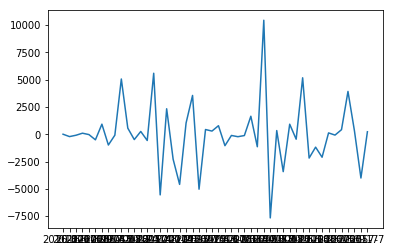

<Figure size 1000x1000 with 0 Axes>

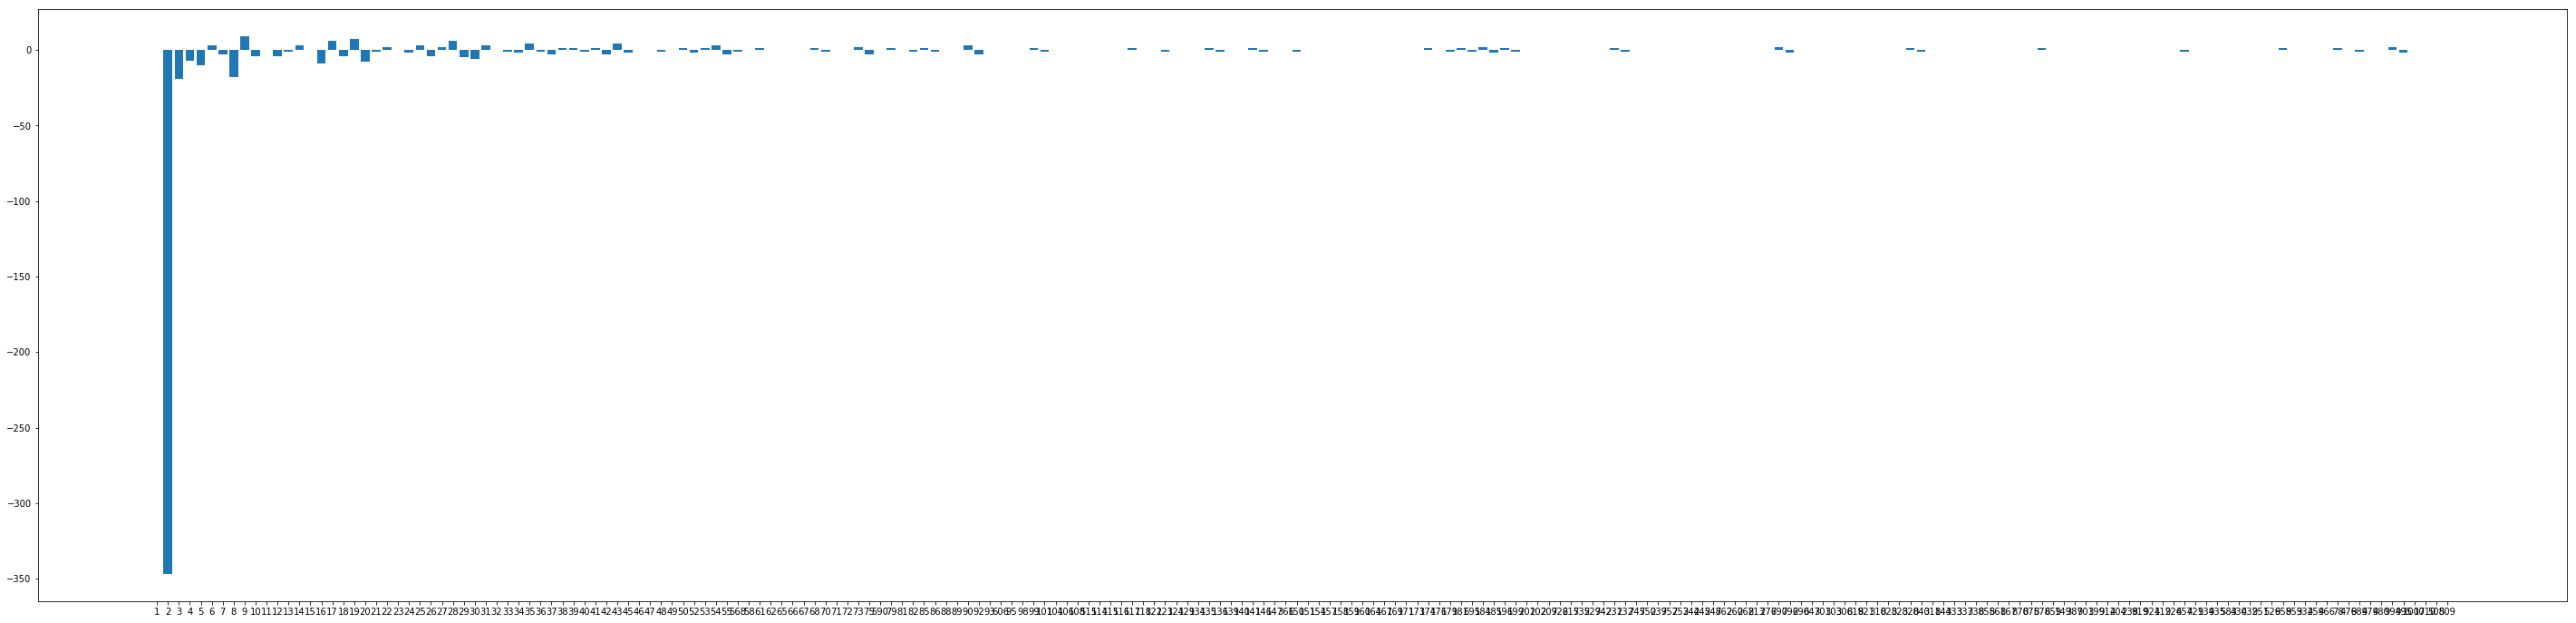

In [274]:
print_histogram_from_ordered_set(derivatives)


<Figure size 1000x1000 with 0 Axes>

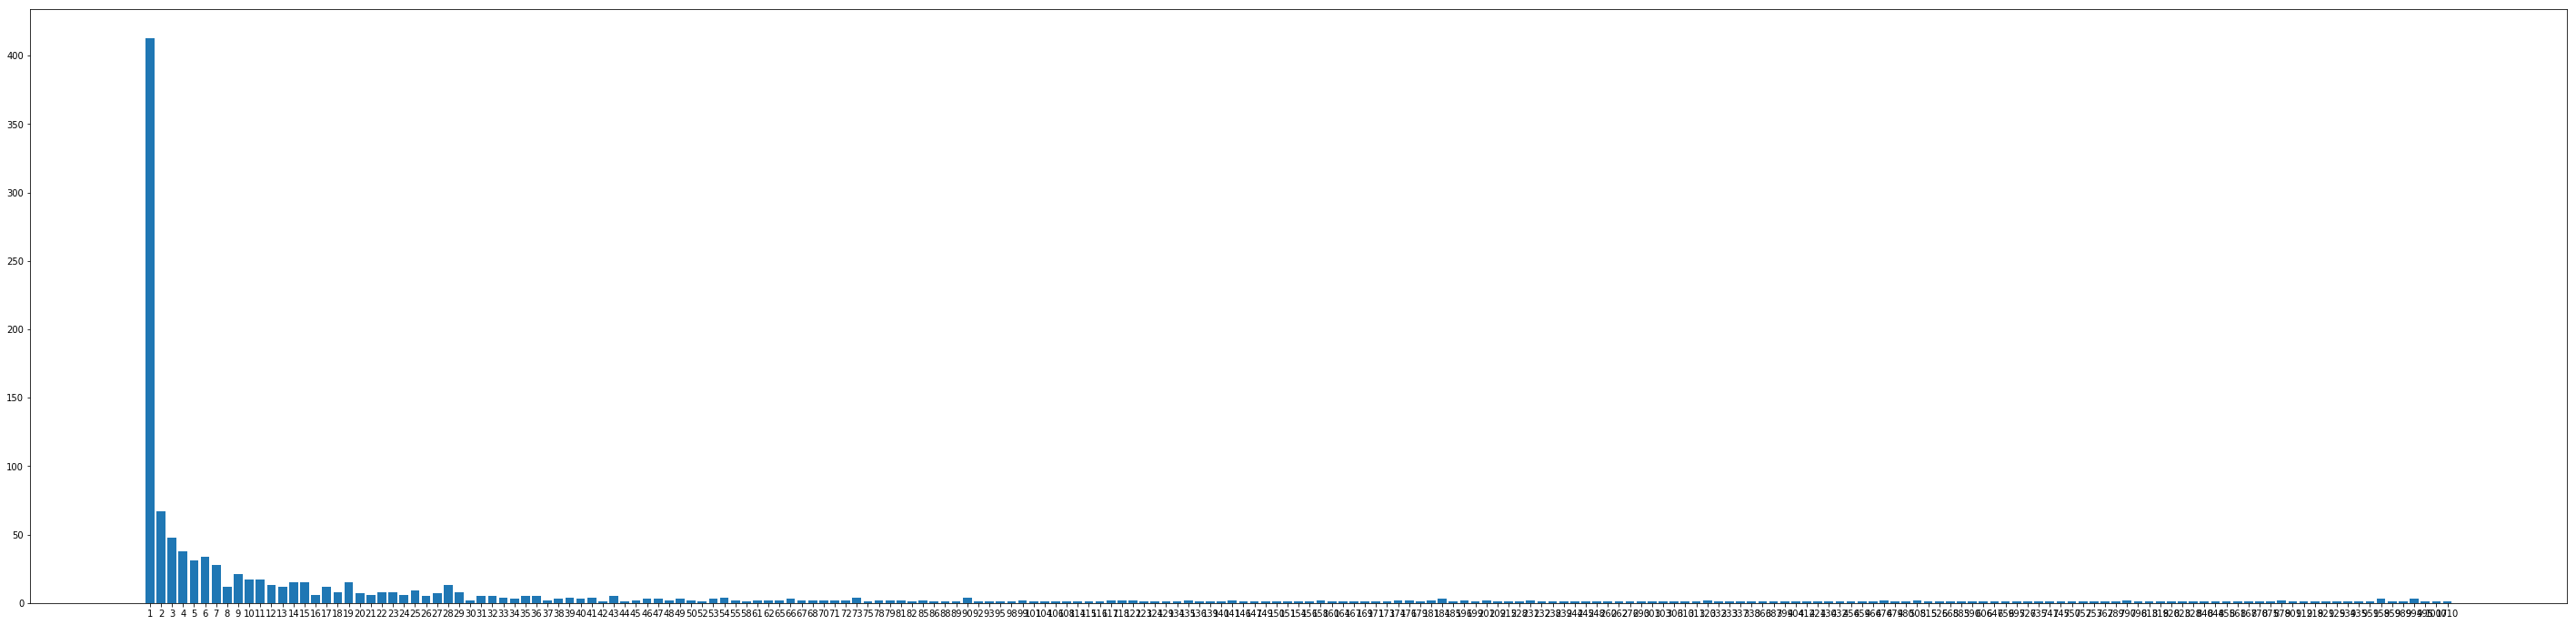

In [208]:
print_histogram_from_ordered_set(histogram_occurrences_to_days)

<Figure size 1000x1000 with 0 Axes>

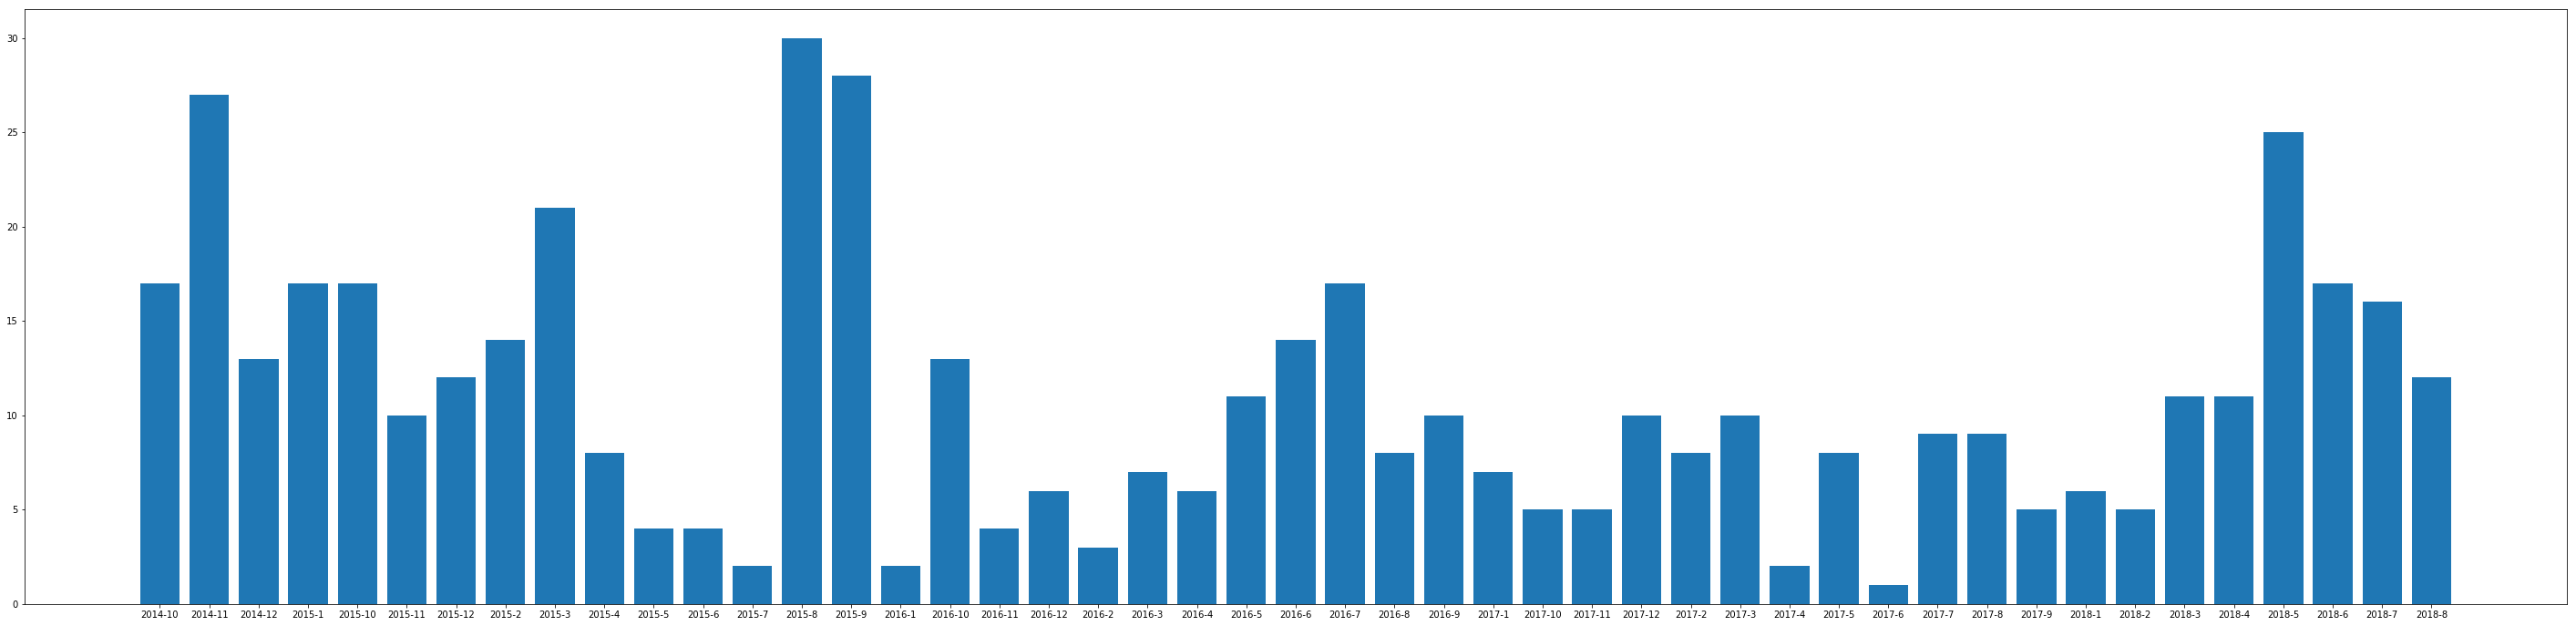

In [260]:
print_histogram_from_ordered_set(order_histogram(histogram_creations_by_month(df,'Issue Type',['New Feature','Task'])))

In [153]:
sample_of_july  = df[df['Created'] > pd.to_datetime('01-Jul-2018')]

In [161]:
sample_of_july.loc[110]['Labels']

'bug_zero'

In [ ]:
import statistics

foca = select_issues_unresolved(df,True)
foca['Issue Type'].value_counts()


In [ ]:
test_histogram.keys()
plt.plot(histogram_by_month.keys(),histogram_by_month.values(),'r-')
plt.show()